<h1 style="font-size:160%; text-align:center;">OLIVE TREE DISEASE DETECTION</h1>

<HR WIDTH="40%" ALIGN=CENTER>

<center><b>Author:</b> Raghad Ibrahim <br>
<b>Date:</b> April 2, 2024 <br>
<b>Topic:</b> Olive Trees Disease Diagnostics  </center>
    <HR WIDTH="40%" ALIGN=CENTER>

<center><b>Abstract</b></center><br>

 The Olive Tree, an ancient symbol of peace and endurance, holds significant cultural and agricultural importance across the Mediterranean region and beyond. The production of olive oil is facing a significant threat nowadays due to climate change and the spread of diseases. This project explores the application of computer vision techniques for the analysis and classification of leaf images to identify potential diseases or health issues. The dataset used in this paper consists of images of leaves from three classes: healthy leaves, leaves infected with Aculus Olearius disease, and leaves affected by Peacock Spot disease. The goal is to develop an image classification model capable of accurately distinguishing between these classes based on features extracted from the images. Overall, this project aims to contribute to the field of agricultural diagnostics by providing a reliable tool for automated detection and classification of leaf diseases.



### Table of Content

<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART I: Project Overview</p></i>

> **1. [Introduction](#intro)**
	> > 1.1. [Literature Review](#1.1)
>
<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART II: Data Analysis</p></i>
> 
> **2. [Methodology](#methodology)**
	> > 2.1 [Approach](#2.1)   
	> > 2.2 [Dataset](#2.2)     
	> > 2.3 [Dependencies](#2.3)   
	> > 2.4 [Getting Started](#2.4)
>
> **3. [Data Preprocessing](#preprocessing)**
	> > 3.1 [A First Look At The Data](#3.1)  
	> > 3.2 [Identifying Image Imbalance](#3.2)  
	> > 3.3 [Plotting Image Size](#3.3)     
>
> **4. [Exploratory Data Analysis](#eda)**   
> > 4.1. [Orientation](#4.1)  
> > 4.2. [RGB Channels](#4.2)  
>
> **5. [Modeling and Evaluation](#model_eval)**
>
<i><p style="border-width:2px; border-style:solid; border-color:#808080; padding: 0.5em;text-align:left;">PART III: Findings</p></i>
> 
> **6. [Discussion](#discussion)**  
    </font>

<hr>

*PART I: Project Overview* 
<a id='intro'></a>
## Introduction

<p  style="text-indent: 25px;">  Olive trees are suseptible to getting sick with some diseases that could affect a tree's health and its ability to produce olives, which makes it very important for farmers to be able to catch these conditions early on to address them before harvesting season.  These conditions include diseases like Aculus Olearius which is caused by mites and causes leaf discoloration, as well as Peacock Spot Disease which causes dark spots on an olive leaf. More details about the symptoms and causes of these two diseases will be provided in the next section.</p>

<p  style="text-indent: 25px;">  Most farmers rely on traditional techniques, such as visual observation, or biological tests and fungal analysis, to detect these diseases. However, these methods require significant expertise and resources, including time. Hence, increasing the efficiency of the process of detecting and diagnosing olive trees becomes imperative to save as many trees as possible. The potential for improving disease diagnostics lies in developing effective alternatives to traditional plant disease identification methods, including those for olive trees. We can utilize technological advancements in machine learning and deep learning to facilitate precise disease identification through data and image analysis.</p>



<a id='1.1'></a>
### Literature Review

Aculus Olearius is a disease caused by Aceria Oleae, a mite that belongs to eriophyid mites. This barely visible mite is a worm-like mite with circular cross section which dimensions are in the micrometers range, yet its microscopic size doesn't stop it from inflicting great harm to olive trees as it is the main pest found in olive trees in the Mediterranean region. Cases of this condition were reported in Palestine, Egypt, Tunisia, and Turkey. The mite feeds on the growing points in the leaves, thus causing deformations in the way a leaf grows. Therefore younger trees tend to be more vulnerable to these brutal attacks. The pest may even kill the productive center for the plant significantly inhibiting its growth. 

Peacock Spot Disease is another common fungal disease that affects olive trees. It is caused by the fungus Spilocaea oleagina, but took its named from its distinctive peacock feather-like spots that appear on the leaves of an infected tree. These spots are usually dark, circular, and have a yellow halo around them, making them quite noticeable against the green of the olive leaves. These can lead to premature leaf drop, weakening the tree over time. With the tree being infected, its ability to photosynthesize is practically diminished inhibiting its ability to grow fruits and can spread quickly to other trees.

In both cases we can see why an early diagnosis is ablsolutely crucial to a farmer. 


 <hr>   
	
 *PART II: Data Analysis* 

<a id='methodology'></a>
## Methodology 

<a id='2.1'></a>
### Approach

#### Image Composition and Pixels

In digital imaging, every image is composed of a matrix of pixels, each representing the smallest unit of the image. For instance, an image with dimensions of 600x800 is constructed from 480,000 individual pixels, arranged in a grid of 600 pixels vertically and 800 pixels horizontally. Each pixel is essentially as a tiny square with a specific color, contributing to the overall image when viewed collectively.


#### RGB Channels

The diversity of colors displayed by these pixels can be described by the RGB Color Model, which is the foundational principle in representing digital images. The RGB Color Model operates on the premise that any visible color is just a precise combination of varying intensities (0 to 255) of red, green, and blue light. Here, a value of 0 denotes the absence of light, resulting in complete darkness, whereas a value of 255 represents the maximum brightness of the color. By adjusting the intensity levels of these three primary colors, the RGB model can generate a wide spectrum of colors, enabling digital devices to reproduce nearly any color perceivable by the human eye.

In a digital image, each pixel is assigned a single color, which by the RGB model can be broken down into a precise combination of Red, Green, and Blue. In other words, every pixel, which we consider the row value has three features that can be used as columns. This way we can view each image as a unique dataset whose rows represent the individual pixels and columns represent the unique color combination consisting of the various intensities of Red, Green. amd Blue..

#### Convolution

<a id='2.2'></a>
### Dataset

For this project I have used a public dataset to build a model that can detect various diseases in Olive leaves. The dataset consists of over 3,400 
images of olive leaves collected from Denizli City, Turkey. The images are classified into the following classes:  

- Olive Leaves infected with Aculus Olearius.
- Olive Leaves infected with Peacock Spot.
- Healthy Olive Leaves.


<a id='2.3'></a>
### Dependencies

We will start off by importing some basic data analysis libraries such as Pandas, Numpy, Matplotlib, and Seaborn. 

In [1]:
## IMPORT LIBRARIES ##

import numpy as np #numpy for 

import pandas as pd # pandas

from matplotlib import pyplot as plt # matplot library
import seaborn as sns

We will also be importing some more libraries specific to images.

In [2]:
## IMPORT LIBRARIES ##

import os  
from matplotlib import image as mpimg
from random import randint
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
from glob import glob
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

##########

<a id='2.4'></a>
### Getting Started

The `os` library gives us access to the file system. I will be using the `os` library to load the images as seen below:

In [3]:
## importing `os` library ##

import os                              

In [4]:
## Load the image directories ##

dir = 'dataset' # paste your folder directory

# returns a list containing the names of the images in the `healthy` folder
training_healthy_data= os.listdir(dir + '/training/healthy') # training dataset
testing_healthy_data = os.listdir(dir + '/training/healthy') # testing dataset

# returns a list containing the names of the images in the `aculus olearius` folder
training_aculus_data= os.listdir(dir + '/training/aculus_olearius') # training dataset 
testing_aculus_data = os.listdir(dir + '/training/aculus_olearius') # testing dataset

# returns a list containing the names of the images in the `peacock spot` folder
training_peacock_data= os.listdir(dir + '/training/peacock_spot') # training dataset 
testing_peacock_data = os.listdir(dir + '/training/peacock_spot/') # testing dataset

#all_data = [healthy_data, aculus_olearius_data, peacock_disease_data]

In [5]:
training_dir = {
    'Healthy Leaves': os.path.join(dir, 'training/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'training/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'training/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

testing_dir = {
    'Healthy Leaves': os.path.join(dir, 'testing/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'testing/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'testing/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

training_data = {
    'Healthy Leaves': training_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': training_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': training_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}

testing_data = {
    'Healthy Leaves': testing_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': testing_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': testing_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}
##########

Now that the dataset has been successfully loaded from the corresponding directories, we can proceed with the preprocessing stage. 
<br><br>

<hr>

 *PART II: Data Analysis*  

 <a id='preprocessing'></a>
## Data Preprocessing

The process of analyzing the dataset involves some Preprocessing before building the model itself. The goals in this stage are the following:

- Take a look at a sample of our data to get an idea of what the data in each class looks like
- Check for any class imbalance in terms of the number of images we have
- Ensure the size of the images across the three classes is consistent


<a id='3.1'></a>
### A First Look At The Data

We can start off by taking a look at the data we are working with. Again, the dataset constitutes of thousands images for each of the three states of an olive leaf that we are trying to detect: a healthy leaf, a leaf infected with Aculus Olearius, and a leaf infected with Peacock Spot Disease so we expect to see three categories of leaves.

To do this, we will display a small sample of each class to get an idea of the images in that group. This can be done through generating a random sample of the images from each of the three classes, starting with the healthy leaves followed by leaves infected with Aculus olearius disease and finally leaves infected with peacock spot disease.

In [6]:
## STEP 1: Using the dictionary below

training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}

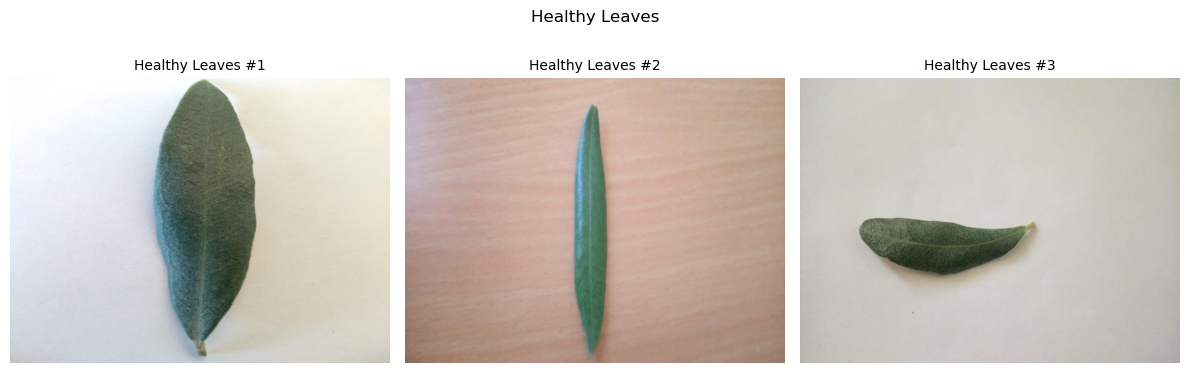

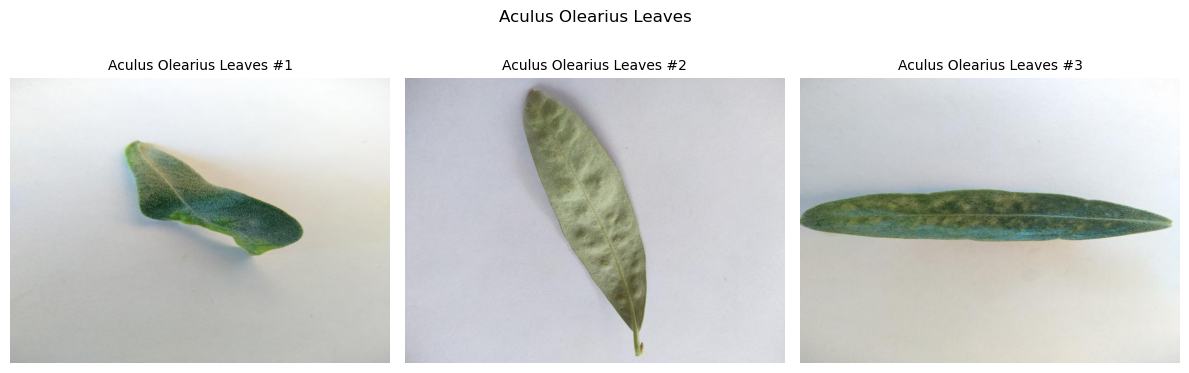

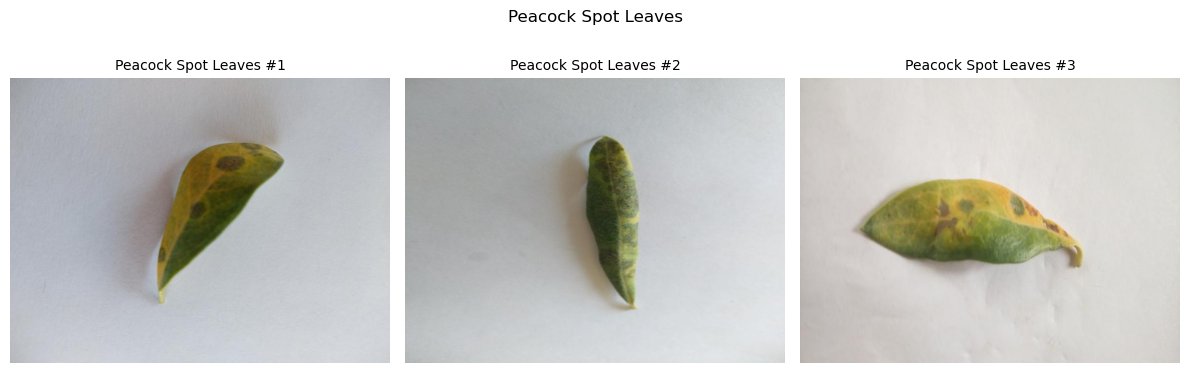

In [7]:
## STEP 2: Loop through each class to generate and plot samples

for class_name, directory in training_dir.items():
    
    all_images = os.listdir(directory) # Get all image filenames for the current class
    selected_images = np.random.choice(all_images, 3, replace=False) # Randomly select a sample of images
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4)) # Set up a subplot grid for the current class

    # Loop through the selected images to display them
    for i, image_name in enumerate(selected_images):
        
        img_path = os.path.join(directory, image_name) # Construct the path to the image file
        image = Image.open(img_path)  # Open the image

        axs[i].imshow(image) # Display the image in the subplot
        axs[i].set_title(f"{class_name} #{i+1}", fontsize=10) # Set the title for each subplot
        axs[i].axis('off') # Remove axis ticks


    # Display the plot for the current class
    plt.suptitle(class_name, fontsize=12)  # Set title for the entire plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

####

#### Obsevations:  

1. We see that the leaves display a visible difference to the human eye with healthy leaves looking, well, healthy as opposed to leaves with Aculus Olearius Infected Leaves which are visibly more wrinkly and the peacock spot leaves looking more yellowing with the distinctive spots.
2. The leaves are oriented differently across the dataset
3. The backgrounds are not consistent
4. The shadows and image lighting are not consistent

All of these are concerns that we will address in the EDA stage.

<a id='3.2'></a>
### Identifying Image Imbalance

The next step is to identify whether our dataset has any class imbalance in terms of the number of images each one has. To do this, we’re going to find the number of images assigned to each class and plot them in a bar chart to easily identify any imbalance. Imbalance could result in poor performance for the class with less representation, impacting overall performance of the models later on.


In [8]:
## STEP 1: Initialize a dictionary with class names as keys and the number of images in each class as values

training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}

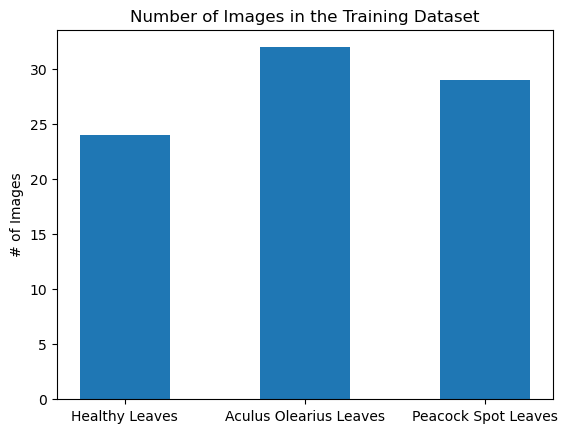

In [9]:
## STEP 2: Find the number of images in each class

training_leng = [len(training_dir['Healthy Leaves']), len(training_dir['Aculus Olearius Leaves']), len(training_dir['Peacock Spot Leaves'])]


## STEP 3: Plot the number of images for each class using a bar chart

plt.bar(training_dir.keys(), training_leng , width = .5)  # (x,y) = (class name, mumber of images)
plt.title("Number of Images in the Training Dataset")  # Title of the plot
plt.ylabel('# of Images')  # Label for the y-axis
plt.show()  # Displays the plot

####

In [10]:
## STEP 1: Initialize a dictionary with class names as keys and the number of images in each class as values ##

testing_dir

{'Healthy Leaves': 'dataset/testing/healthy',
 'Aculus Olearius Leaves': 'dataset/testing/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/testing/peacock_spot'}

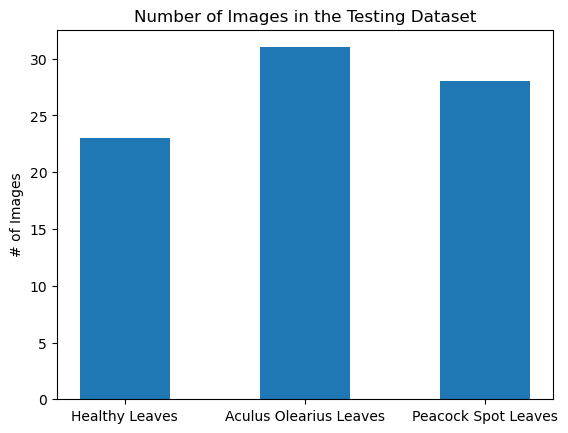

In [11]:
## STEP 2: Find the number of images in each class ##

testing_leng = [len(testing_dir['Healthy Leaves']), len(testing_dir['Aculus Olearius Leaves']), len(testing_dir['Peacock Spot Leaves'])]


## STEP 3: Plot the number of images for each class using a bar chart ##

plt.bar(testing_dir.keys(), testing_leng , width = .5)  # (x,y) = (class name, mumber of images)
plt.title("Number of Images in the Testing Dataset")  # Title of the plot
plt.ylabel('# of Images')  # Label for the y-axis
plt.show()  # Displays the plot

####

#### Observations: 

- We have a clear imbalance in the dataset with significantly more images in Class 2 followed by Class 0 and then Class 1 which falls slighly below Class 0. This could affect the training phase of the predictive models considering we do not have as much data to train for the second classc to train it on. 

In [12]:
# Creating a DataFrame from the counts
df_counts = pd.DataFrame([training_leng, testing_leng], index=['Training', 'Testing'])

df_counts

,0,1,2
Training,24,32,29
Testing,23,31,28


  <HR WIDTH="30%" ALIGN=LEFT>

<a id='3.3'></a>
### Plotting Image Size

It is important that we maintain a consistent image size throughout the different classes in our dataset to avoid mismatched matrices when we start modeling. We can visualize the raw image size in each class using a scatter plot as seen below. 






In [13]:
## STEP 1: Define a dictionary with directory names for each class of images ##

training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}

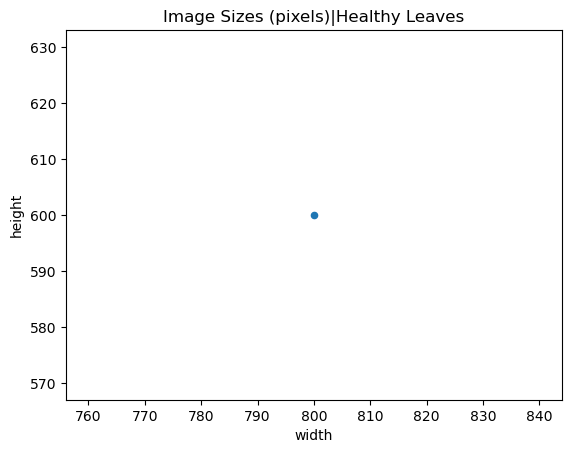

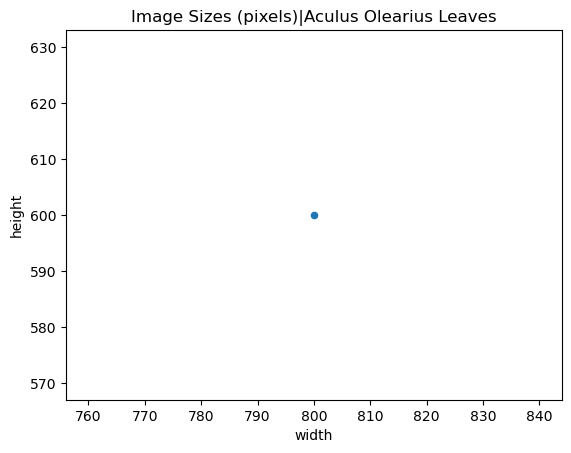

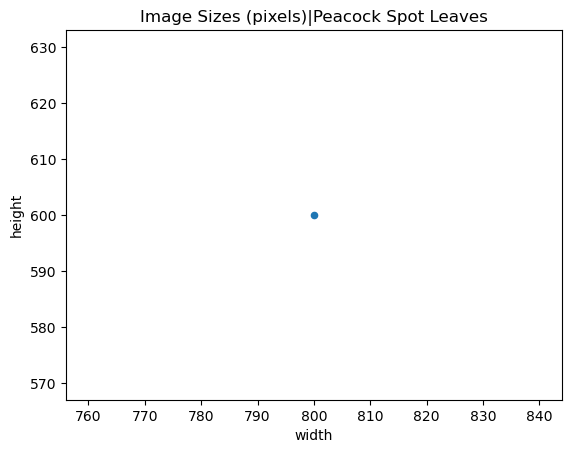

In [14]:
## STEP 2: Loop through each directory in the dictionary ##

for name, directory in training_dir.items():
    
    # List all files in the current directory
    filelist = [os.path.join(directory, f) for f in os.listdir(directory)] 
    
    # Initialize lists to store the heights and widths of images
    heights = [] # list to store the height of each image
    widths = [] # list to store the width of each image

    
## STEP 3: Loop over each file in the directory ##
   
    for file in filelist:
        
        try:
            img = mpimg.imread(file) # Attempt to read the image file
        except:
            continue # If reading the image fails, skip to the next file
            
        # Extract the height and width of the current image     
        h = img.shape[0] # image height
        w = img.shape[1] # image width

        # Append the image's dimensions to the respective lists
        heights.append(h)
        widths.append(w)

## STEP 4:
    
    # Create a DataFrame from the collected image dimensions
    dim_df = pd.DataFrame({'height': heights, 'width': widths})
    
    # Group the dimensions to count the occurrence of each size combination    
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
    
    # Plot
    sizes.plot.scatter(x='width', y='height',) # scatter plot where x-axis represents width and y-axis is height
    plt.title(f'Image Sizes (pixels)|{name}') # set the title of the plot to indicate the class of images being plotted
    plt.show()  # display plot for each class

####

#### Obsevations:  

We can see above displayed by the single point in each plot that all our images in the three classes are in fact the same size: $600*800$ pixels. This means that every image has a height made up of $600$ pixels and a width of $800$ pixels.   <br>

<hr>

 *PART II: Data Analysis* 

<a id='eda'></a>
## Data Exploratory Analysis

In this phase we will be exploring the image dataset in depth words words
In the Exploratory Data Analysis (EDA) phase of this project, a key focus is to examine the dataset in depth for any potential biases that could mistakenly be interpreted as distinguishing features by the machine learning models later on. This includes the orientation of the leaves as well as the color composition of the backround which makes up the majority of the pixels in any given image.


<HR WIDTH="30%" ALIGN=LEFT>

<a id='4.1'></a>
### Orientation

(fix the words words) A notable concern is the orientation of the olive leaves within the images, which can be mistakenly extracted as a feature by the predictive models later on. To eliminate any potential bias that could impact the model's ability to generalize, it is imperative to ensure that the dataset displayed a sufficient variation in leaf orientation. 

To mitigate this risk, we must carefully inspect and ensure similar variation in the leaf orientation across the three classes. The method chosen to do this is by finding the slope of a leaf within an image, which involves a lengthy process summarized below: 

1. Flatten an image
2. Apply KMeans to segment an image into two clusters: the leaf and the background
3. Crop the image down to show just the leaf
4. Find the slope
6. Plot a line with the found slope on the same plot as the image

First I will illustrate the process by doing it on a single image from the dataset and then I will apply the process on the entire dataset by iterating across the classes.

#### On a sample

(600, 800, 3)

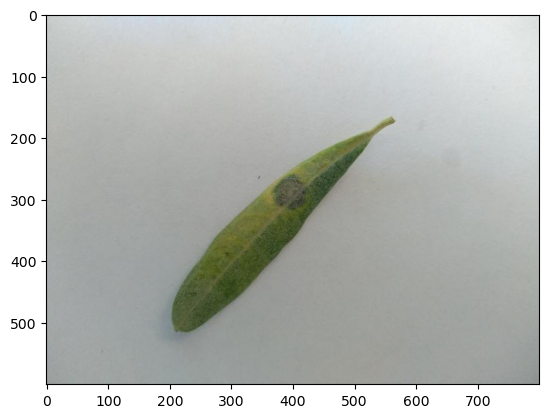

In [15]:
#########################################
## GENERATE ANY IMAGE FROM THE DATASET ##
#########################################


img_ex = mpimg.imread(dir + '/training/peacock_spot/' + training_peacock_data[9]) # Read an image from the specified directory and file name

plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

For this we will be using the `KMeans` library from `sklearn.cluster` which we will import below:

In [16]:
## IMPORT LIBRARY##

from sklearn.cluster import KMeans 

Before running the K-Means mode, we must reshape the image from its current dimensions $600*800*3$ into a 2D array where each row represents a pixel and the colums represent the RGB channels. Since we have $600*800$ pixels, we expect to see $480000$ pixels as our row value and $3$ for our column value representing the three color channels.

In [17]:
## Reshape the image
flat_image = img_ex.reshape(-1, 3) # The '-1' automatically calculates number of pixels in the image

# SANITY CHECK
flat_image.shape

(480000, 3)

Now we can start the process of applying the K-Means clustering algorithm to an image for segmentation, aiming to differentiate between two primary features or segments within the image. This line trains the KMeans model using the RGB values of every pixel in the image. The model will then create two clusters to distinguish between the two primary colors/clusters in the image. 


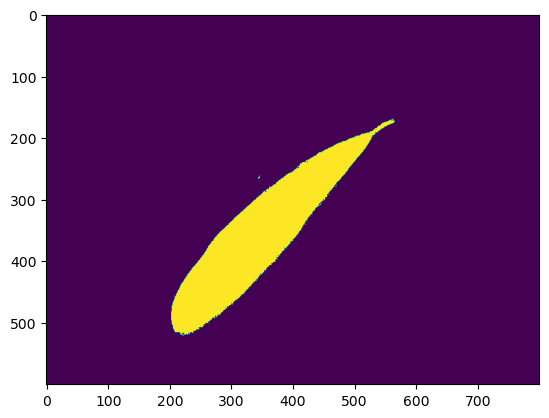

In [18]:
## STEP 1: Instantiate the K-MEANS Model 

kmeans = KMeans(n_clusters=2, random_state=123) # 2 clusters to segment the image into leaf and background
kmeans.fit(flat_image) # Fit the K-Means model on the flattened image data
labels = kmeans.predict(flat_image) # Predict the labels for each pixel in the image
label_img = labels.reshape(600,800) # Reshape the labels back into the original image dimensions


## STEP 2: Ensure that the leaf is consistently labeled as 1 across runs

if labels.sum() > (1-labels).sum():
   labels = 1 - labels


## STEP 3: Display the image

plt.figure() # Create a new figure for plotting
plt.imshow(labels.reshape(600,800)) # Reshape the labels array to the original image dimensions (600x800)
plt.show() # Display the segmented image on a plot

####

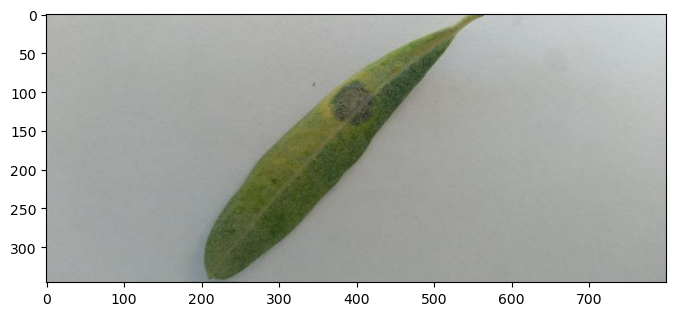

In [19]:
## STEP 4: Find the first and last row index where the sum of labels in the row is greater than 10
first_row_index = np.argmax(label_img.sum(axis=1) > 10)
last_row_index = 600 - np.argmax((label_img.sum(axis=1) > 10)[::-1])

## STEP 5: Creating a new figure with specified dimensions
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, :]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

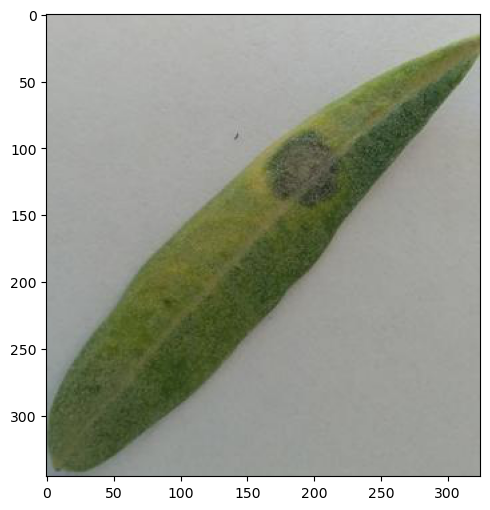

In [20]:
## STEP 6: Find the first and last column index where the sum of labels in the column is greater than 10
first_col_index = np.argmax(label_img.sum(axis=0) > 10)
last_col_index = 800 - np.argmax((label_img.sum(axis=0) > 10)[::-1])

## STEP 7: Creating a new figure for displaying the cropped image
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, first_col_index:last_col_index]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

In [21]:
## STEP 8: Compute the slope 

slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

slope

1.0646153846153845

Now that we've managed to compute the slope of the leaf's orientation, we can use it to plot a line over the image to ensure that it does indeed match the leaf

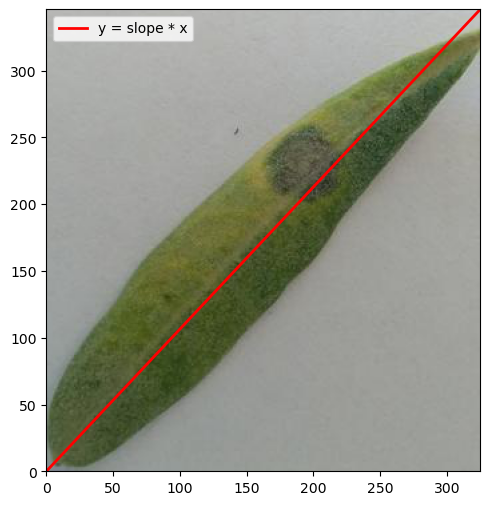

In [22]:
## STEP 9: Store the cropped image as a new variable
new_img = img_ex[first_row_index:last_row_index, first_col_index:last_col_index]

## STEP 10: Plot

plt.figure(figsize=(10, 6))  # Adjust figure size to maintain ratio

# Set extent to image's width and height to the new dimensions of the cropped image
plt.imshow(new_img, extent=[0, last_col_index - first_col_index, 0, last_row_index - first_row_index])  

# Generate (x,y)
x = np.arange(0, 801) # Generate x values within the width of the image
y = slope * x # Calculate y values based on the line formula
plt.plot(x, y, 'r-', linewidth=2, label='y = slope * x') # Overlay the line plot on the image

# Set the plot limits to exactly match the image dimensions
plt.xlim([0, last_col_index - first_col_index])
plt.ylim([0, last_row_index - first_row_index])  

plt.legend() # Add legend
plt.show() # Show the plot

We can now proceed with building a function that we can use to iterate through the images and find the associated slope or orientation of the leaf.

#### Iterate through the three directories

First we need to find the slopes for all the images in every class. To do this, we will define a slope function `get_slope( )` that takes in an image and outputs the slope:

In [23]:
# Define the Function #
def get_slope(img):
    '''
    Takes in an RGB image array and returns the slope of the leaf's orientation in the image.
    
    Parameters:
    img (numpy.ndarray): The input image array in RGB format.
    
    Returns:
    float: The calculated slope of the leaf's orientation.
    '''
    
    # Flatten the image for KMeans
    flat_img = img.reshape(-1, 3)
    
    # Apply KMeans to segment the image
    kmeans = KMeans(n_clusters=2, random_state=123)
    kmeans.fit(flat_img)
    labels = kmeans.predict(flat_img)
    
    # Ensure the majority class is considered as the leaf
    if labels.sum() > (1-labels).sum():
        labels = 1 - labels

    # Reshape labels back to the original image shape
    label_img = labels.reshape(600,800)
    label_sum_row = label_img.sum(axis=1)
    label_sum_col = label_img.sum(axis=0)

    # Calculate first and last indices for rows and columns where the leaf is present
    first_row_index = np.argmax((label_sum_row) > 10)
    last_row_index = 600 - np.argmax(((label_sum_row) > 10)[::-1])
    first_col_index = np.argmax((label_sum_col) > 10)
    last_col_index = 800 - np.argmax(((label_sum_col) > 10)[::-1])

    # Calculate the slope
    slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

    return slope

Let's test it on a few images:

In [24]:
# SANITY CHECK #

get_slope(img_ex)

1.0646153846153845

And now we can use this function to iterate over the images in the heathy directory and store all the slopes in a list that we can later plot in a histogram. NOTE THIS WILL TAKE OVER AN HOUR TO RUN. Wash the dishes in the meantime.

In [25]:
## Find slope of leaf's orientaton for healthy leaves ##

# empty list
healthy_slopes = [] 

# for loop to iterate through images in healthy directory
for i in training_healthy_data:

    total = len(training_healthy_data) # total number of images is the length of the list of file names
    current = training_healthy_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/healthy/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    healthy_slopes.append(slope) # store slopes in a list
    

In [26]:
## Find slope of leaf's orientaton for peacock spot infected leaves ##

# empty list
peacock_slopes = [] 

# for loop to iterate through images in peacock directory
for i in training_peacock_data:

    total = len(training_peacock_data) # total number of images is the length of the list of file names
    current = training_peacock_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/peacock_spot/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    peacock_slopes.append(slope) # store slopes in a list
    

In [27]:
## Find slope of leaf's orientaton for aculus olearius infected leaves ##

# empty list
aculus_olearius_slopes = [] 

# for loop to iterate through images in aculus_olearius directory
for i in training_aculus_data:

    total = len(training_aculus_data) # total number of images is the length of the list of file names
    current = training_aculus_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/aculus_olearius/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    aculus_olearius_slopes.append(slope) # store slopes in a list
    

#### Observations:

- The slopes of the leaves' orientations across the classes seem to display similar variance which means our predictive model will less likely extract it as a feature.

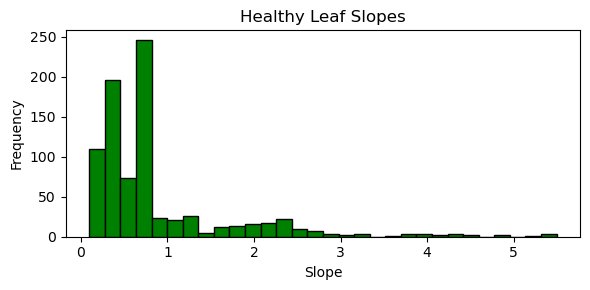

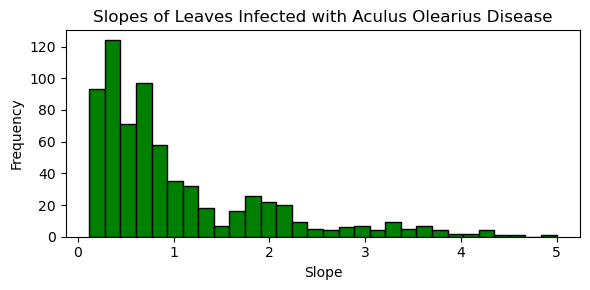

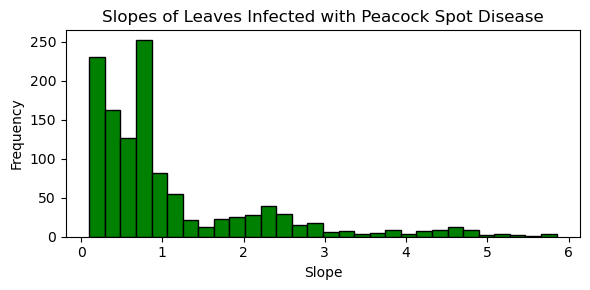

In [28]:
# Dictionary to hold the slope data and corresponding titles
slope_data = {
    'Healthy Leaf Slopes': healthy_slopes,
    'Slopes of Leaves Infected with Aculus Olearius Disease': aculus_olearius_slopes,
    'Slopes of Leaves Infected with Peacock Spot Disease': peacock_slopes
}

# Iterate over the dictionary to generate histograms for each set of slopes
for title, slopes in slope_data.items():
    plt.figure(figsize=(6, 3))  # Set the figure size
    plt.hist(slopes, bins=30, color='green', edgecolor='black')  # Generate the histogram
    plt.title(title)  # Set the title for each histogram
    plt.xlabel('Slope')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the plot

Let's plot the slopes in histograms to see whether they are similarly distributed

--- 

<a id='4.2'></a>
### Color Distribution Analysis

In this section I will analyze the distribution of the three color channels (Red, Green and Blue) for each image and examine the statistical analysis to further understand the dataset. I will also calculate the mean and standard deviation for each RGB channel across all images within each class. This can highlight differences in color distributions that might be characteristic of each class. First I will run it on a single image to illustrate the process and then on the entire dataset.


#### Color Distribution of a Sample of Images

First, I will analyze the color distribution of a single image as seen below:

(600, 800, 3)

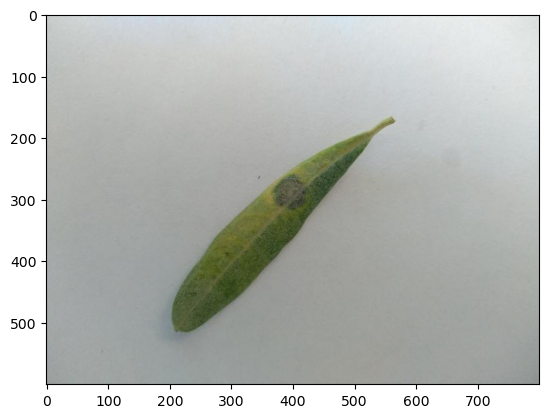

In [29]:
#########################################
## GENERATE ANY IMAGE FROM THE DATASET ##
#########################################


img_ex = mpimg.imread(dir + '/training/peacock_spot/' + training_peacock_data[9]) # Read an image from the specified directory and file name

plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

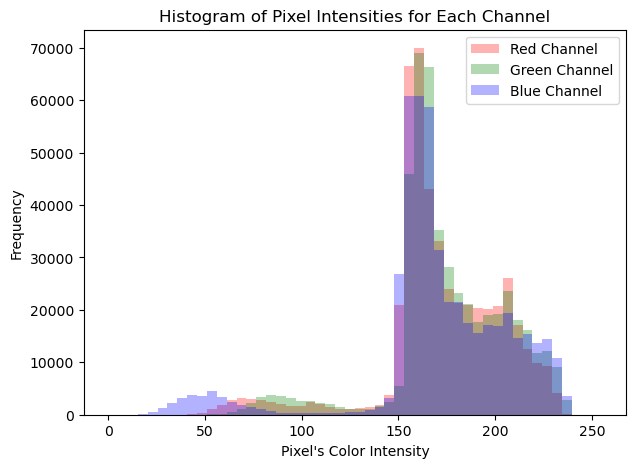

In [30]:
# STEP 1: Initiate some commands

channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels
rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel

plt.figure(figsize=(7, 5))  # Set figure size 


# STEP 2: 

# Loop through each channel
for i in range(3):
    # Extract the current channel's pixel intensities
    channel_data = img_ex[:, :, i].ravel()
    # Generate histogram for the current channel
    plt.hist(channel_data, bins=np.linspace(0, 255, 51), color=rgb_channels[i], alpha=0.3, label=channel_titles[i])


# STEP 3: Adding labels and title to the plot

plt.xlabel("Pixel's Color Intensity") # x-label
plt.ylabel("Frequency") # y-label
plt.title("Histogram of Pixel Intensities for Each Channel") # Setting title 

plt.legend() # Add a legend for the different color channels

plt.show() # Display the combined plot


This plot displays three histograms color coded for their respective channels, with the x-axis representing the pixel's color intensity (0-255) and the y-axis represents the frequency. To make the most out of this process, we must apply it on the entire dataset to examine the variance across the differents classes.

#### Color Distribution Analysis Across Classses

To analyze the color distribution of the entire dataset, I will repeat the above process in a for-loop that iterates through the three classes. I will also perform some statistical analysis to further understand the dataset. 

In [31]:
## STEP 1: 

training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}

In [1]:
rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels for clarity in plotting


## STEP 2: 
for class_name, directory in training_dir.items():
    # Initialize a list to store all channel values for the current class
    all_channel_values = [[], [], []]  # List of lists for red, green, blue channels
    
    # Get a list of all image files in the directory
    image_files = os.listdir(directory)
    total = len(image_files)  # Total number of images
    
    print(f"\nProcessing {class_name}... Total images: {total}")

    # Iterate over each image file in the directory
    for current, img_file in enumerate(image_files, 1): 
        img_path = os.path.join(directory, img_file)
       
        try:
            img = mpimg.imread(img_path)  # Load the image
        except Exception as e:
            print(f"Could not load image {img_file}: {e}")
            continue
        
        # Accumulate channel values
        for i in range(3):  # Loop through each RGB channel
            all_channel_values[i].extend(img[:, :, i].ravel())
        
        # A progress bar 
        print(f"Processing image {current}/{total} in {class_name}.", end="\r", flush=True)

    # Clear the progress line
    print("\nFinished processing images in " + class_name)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Color Distribution for {class_name} Class')

    for i, color in enumerate(rgb_channels):
        channel_values_flat = np.array(all_channel_values[i])  # Convert to numpy array for analysis
        
        # Calculate statistics
        mean_val = np.mean(channel_values_flat)
        std_val = np.std(channel_values_flat)
        
        plt.subplot(2, 3, i+1)
        plt.hist(channel_values_flat, bins=256, color=color, alpha=0.6)
        plt.title(f'{channel_titles[i]}\nMean: {mean_val:.2f}, Std: {std_val:.2f}')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])

    
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

NameError: name 'training_dir' is not defined

In [33]:
training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}


Processing Healthy Leaves... Total images: 832
Processing image 113/832 [████--------------------------] 13%
Could not load image .DS_Store: cannot identify image file 'dataset/training/healthy/.DS_Store'
Processing image 172/832 [██████------------------------] 20%
Could not load image training_healthy.txt: cannot identify image file 'dataset/training/healthy/training_healthy.txt'
Processing image 832/832 [██████████████████████████████] 100%

Finished processing images in Healthy Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


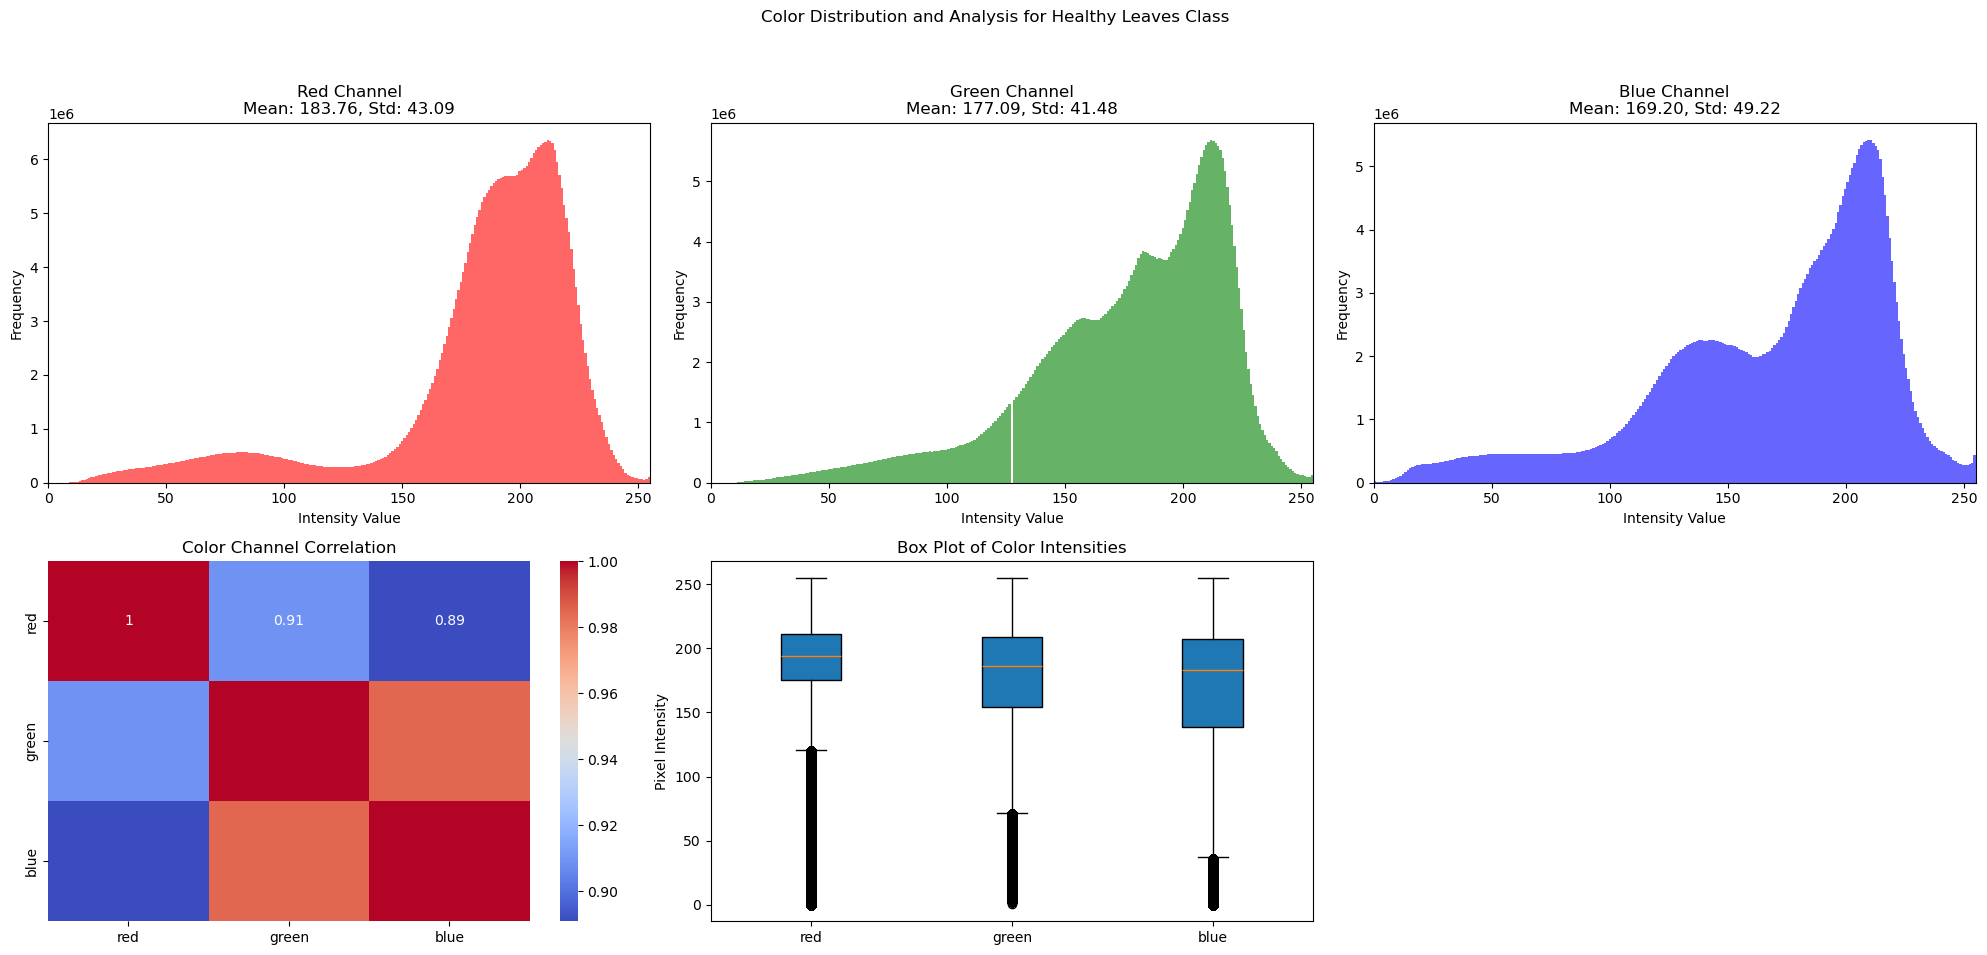


Processing Aculus Olearius Leaves... Total images: 692
Processing image 97/692 [████--------------------------] 14%
Could not load image .DS_Store: cannot identify image file 'dataset/training/aculus_olearius/.DS_Store'
Processing image 121/692 [█████-------------------------] 17%
Could not load image training_aculus_olearius.txt: cannot identify image file 'dataset/training/aculus_olearius/training_aculus_olearius.txt'
Processing image 692/692 [██████████████████████████████] 100%

Finished processing images in Aculus Olearius Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


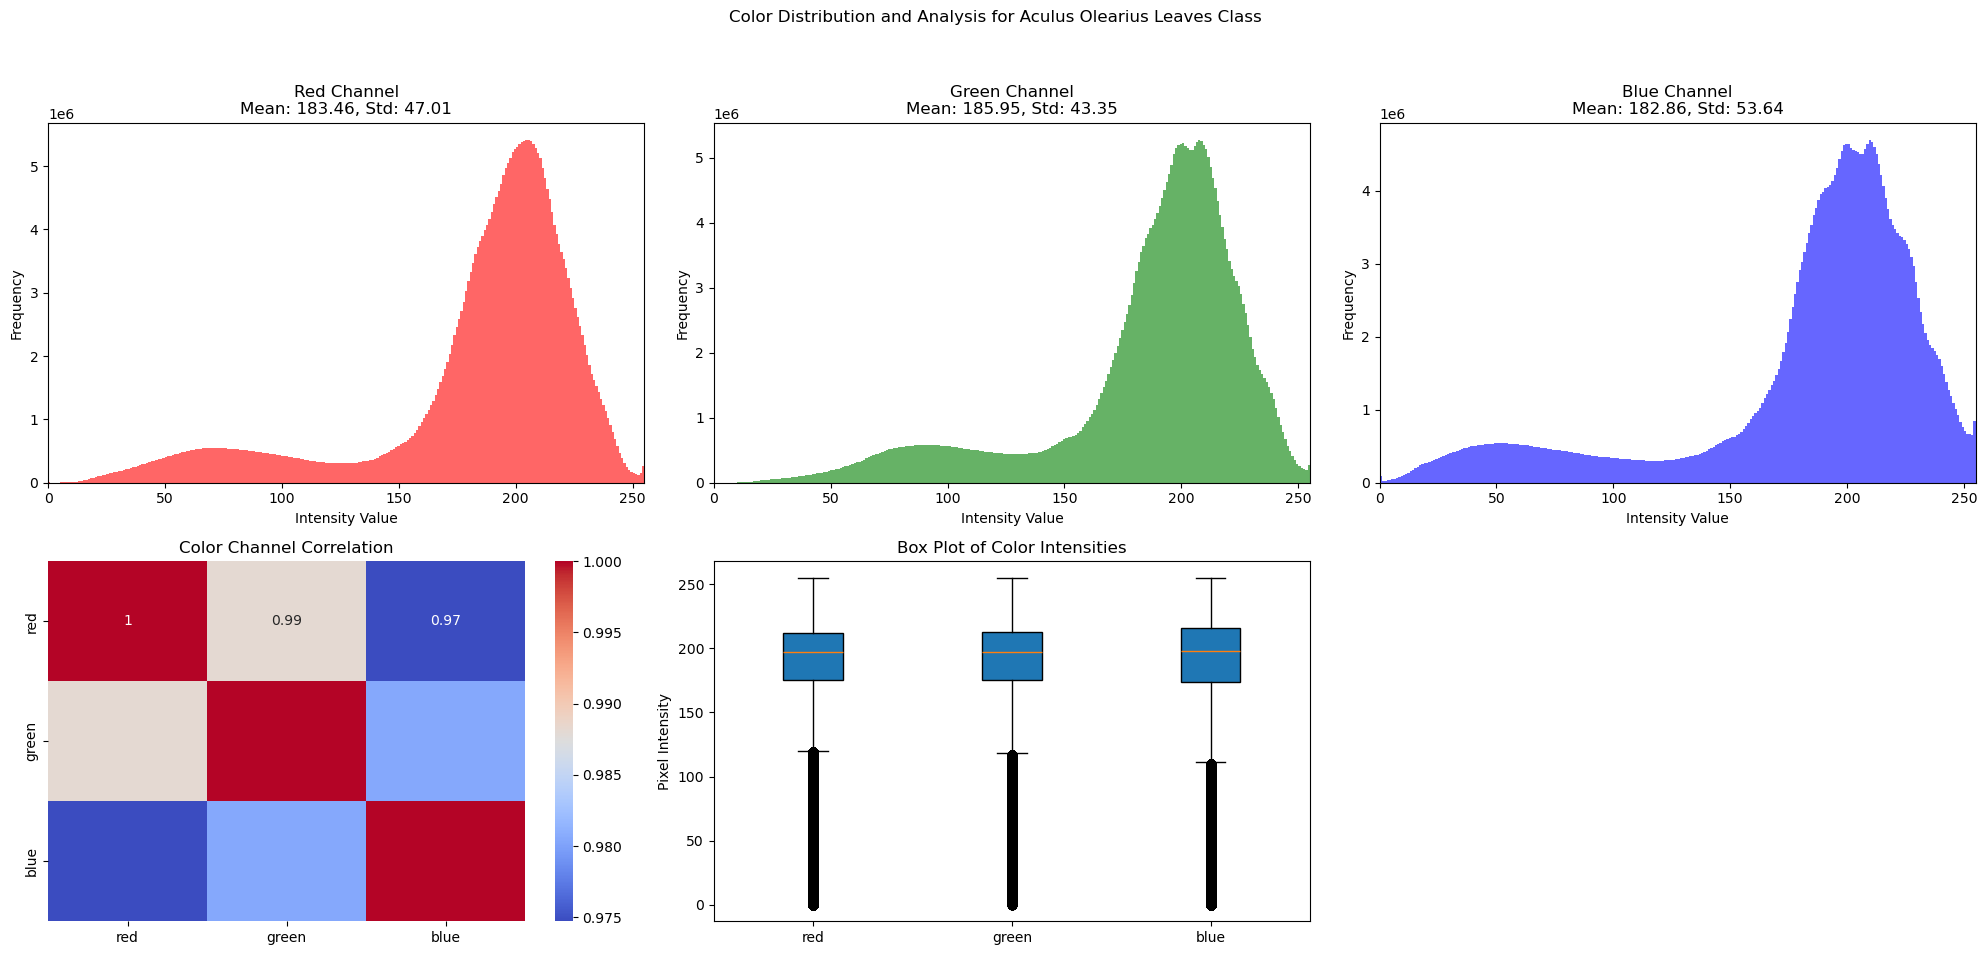


Processing Peacock Spot Leaves... Total images: 1202
Processing image 184/1202 [████--------------------------] 15%
Could not load image .DS_Store: cannot identify image file 'dataset/training/peacock_spot/.DS_Store'
Processing image 1109/1202 [███████████████████████████---] 92%
Could not load image training_peacock_spot.txt: cannot identify image file 'dataset/training/peacock_spot/training_peacock_spot.txt'
Processing image 1202/1202 [██████████████████████████████] 100%

Finished processing images in Peacock Spot Leaves
Starting histogram plots...
Plotting Red Channel histogram...
Plotting Green Channel histogram...
Plotting Blue Channel histogram...
Histogram plots completed.
Starting correlation matrix plot...
Correlation matrix plot completed.
Starting box plot...
Box plot completed.


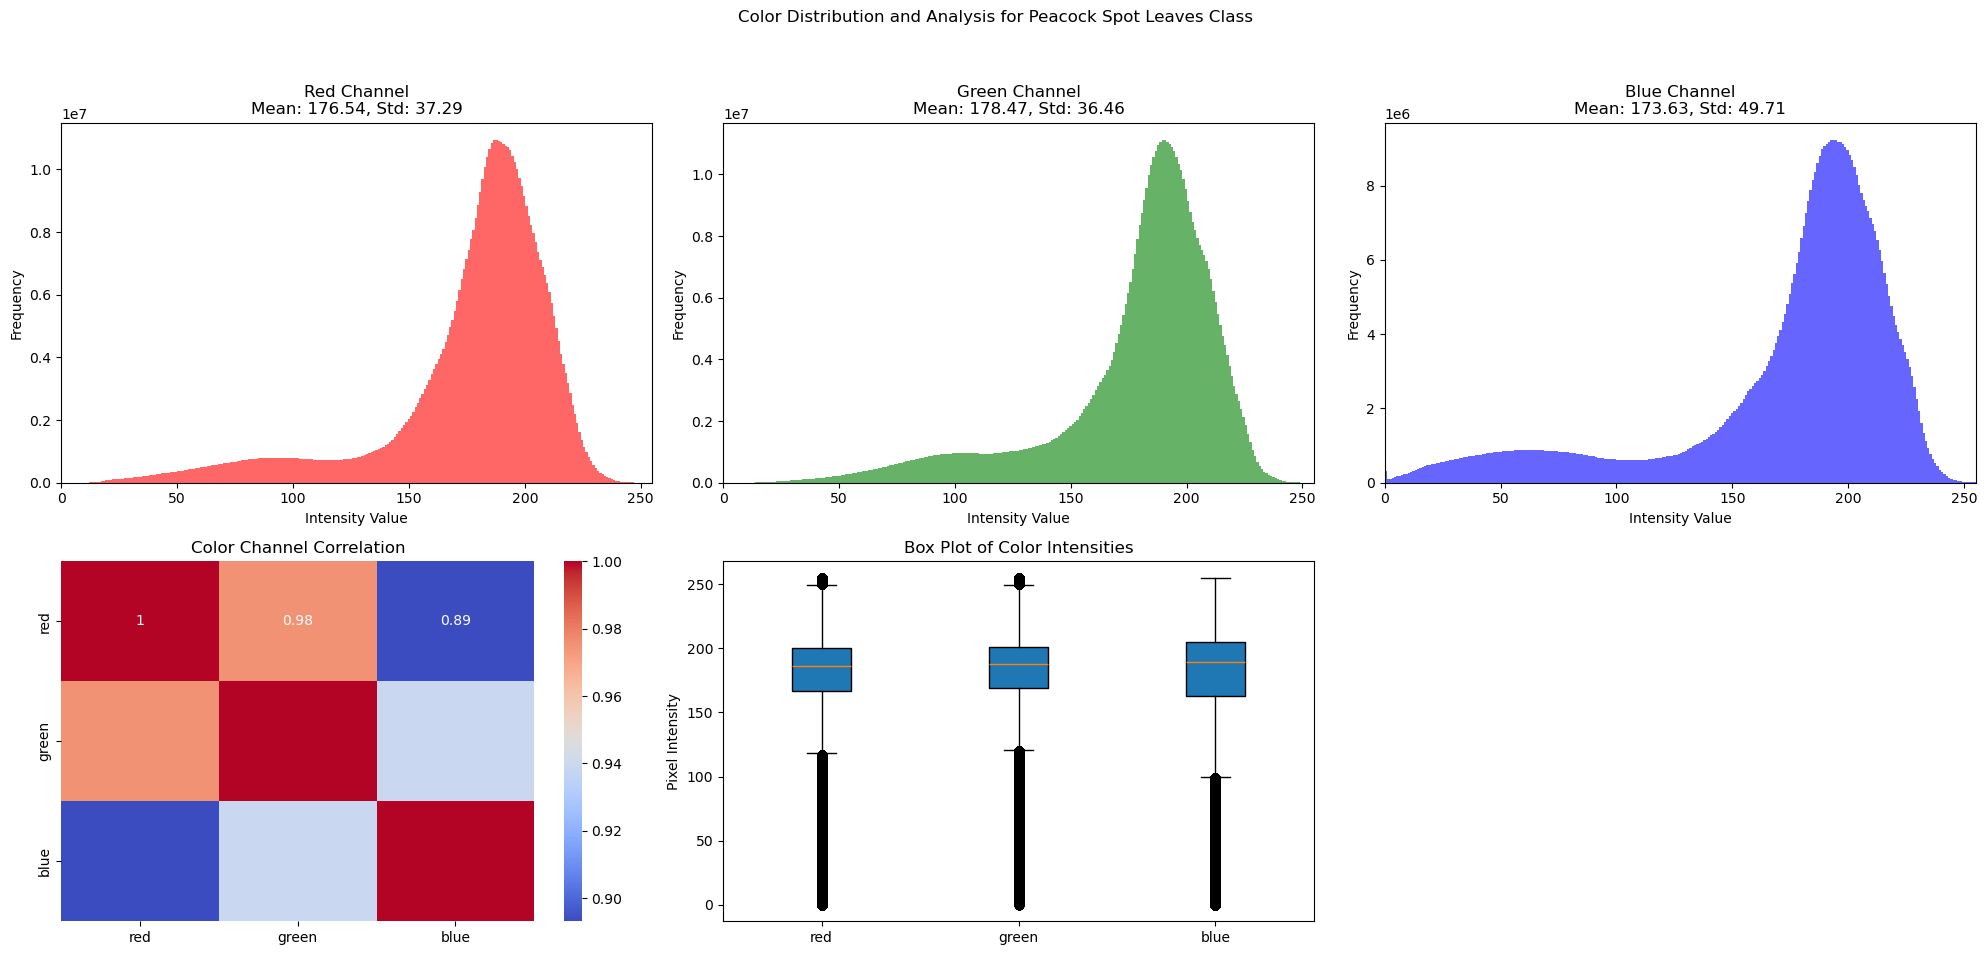

In [35]:
rgb_channels = ['red', 'green', 'blue']
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for class_name, directory in training_dir.items():
    all_channel_values = [[], [], []]  # Initialize for red, green, blue channels
    image_files = os.listdir(directory)  # Get all image files
    total = len(image_files)  # Total number of images
    
    print(f"\nProcessing {class_name}... Total images: {total}")

    for current, img_file in enumerate(image_files, 1):
        img_path = os.path.join(directory, img_file)
        try:
            img = mpimg.imread(img_path)
        except Exception as e:
            print(f"\nCould not load image {img_file}: {e}")
            continue
        
        for i in range(3):  # Accumulate channel values
            all_channel_values[i].extend(img[:, :, i].ravel())
        
        # the progress bar
        progress = int((current / total) * 100)  # Calculate progress percentage
        bar_length = 30
        filled_length = int(bar_length * current // total)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)
        print(f'\rProcessing image {current}/{total} [{bar}] {progress}%', end="\r", flush=True)
        if current == total:
            print()  # Move to the next line when done
    
    print("\nFinished processing images in " + class_name)

    plt.figure(figsize=(20, 10))  # Adjust the size to fit all plots
    plt.suptitle(f'Color Distribution and Analysis for {class_name} Class')

    # Plotting the histograms
    print("Starting histogram plots...")
    for i, color in enumerate(rgb_channels):
        print(f"Plotting {channel_titles[i]} histogram...")
        channel_values_flat = np.array(all_channel_values[i])
        mean_val = np.mean(channel_values_flat)
        std_val = np.std(channel_values_flat)
        
        plt.subplot(2, 3, i+1)
        plt.hist(channel_values_flat, bins=256, color=color, alpha=0.6)
        plt.title(f'{channel_titles[i]}\nMean: {mean_val:.2f}, Std: {std_val:.2f}')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])
    print("Histogram plots completed.")

    # Calculate and plot the correlation matrix
    print("Starting correlation matrix plot...")
    corr_matrix = np.corrcoef([all_channel_values[0], all_channel_values[1], all_channel_values[2]])
    plt.subplot(2, 3, 4)  # Position for the correlation heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=rgb_channels, yticklabels=rgb_channels)
    plt.title('Color Channel Correlation')
    print("Correlation matrix plot completed.")

    # Adding Box Plot
    print("Starting box plot...")
    plt.subplot(2, 3, 5)  # Adjust subplot position for the box plot
    box_plot_data = [np.array(all_channel_values[i]) for i in range(3)]
    plt.boxplot(box_plot_data, patch_artist=True, labels=rgb_channels)
    plt.title('Box Plot of Color Intensities')
    plt.ylabel('Pixel Intensity')
    print("Box plot completed.")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

<a id='4.2.1'></a>
#### Observations:
- The means and standard deviation are largely consistent across the first two classes however for the third class, we see that the standard deviation is significantly lower than the first two class whereas the mean and median seem to be largely consistent. This could be due to the image imbalance mentioned in the preprocessing stage above since the third class has significantly more images.
- We also see that the frequency of the pixels for the third class is also much higher than the first two classes which is also due to the data imbalance.

<hr>

*PART II: Data Analysis* 

<a id='model_eval'></a>
## Baseline Models and Evaluation

A baseline model is developed here to set a benchmark for classification performance. The evaluation framework focused on accuracy, precision, recall, and F1 score metrics to assess the model's effectiveness in correctly classifying the leaf images. Initial results indicated promising classification capabilities, with specific attention paid to minimizing false negatives to avoid missed detections of diseased or infested leaves.


### Logistic Regression

(use more words to explain outline of what I'm doing)
The first model we will build is a Logistic Regression model as seen below: 

#### Import Libraries

For a Logistic Regression model I will be importing the following libraries from `scikit-learn` library:

In [1]:
# Import Libraries

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

#### Instantiate and Fit the Model

STEP 1:
Iterate through the different classes to :

In [2]:
# HEALTHY 
# create empty list for the concatenated counts - big list

big_list = []

for i in training_healthy_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/healthy/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins = np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
    
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


NameError: name 'training_healthy_data' is not defined

In [ ]:
# ACULUS OLEARIUS
# create empty list for the concatenated counts - big list

big_list = []

for i in aculus_olearius_data:
    print("Working on: ", i, end="\r")
    try:
        img = mpimg.imread(dir + '/aculus_olearius/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


In [ ]:
# PEACOCK DISEASE 
# create empty list for the concatenated counts - big list

big_list = []

for i in peacock_disease_data:
    print("Working on: ", i, end = "\r")
    try:
        img = mpimg.imread(dir + '/peacock_spot/' + i)
    except:
        continue

    # create empty list for the 3 counts
    img_rgb = []
    channels = [0,1,2]
    # loop through the 3 color channels
    for  channel in channels:
        
        # get histogram and counts for the channel
        counts, bins = np.histogram(img[:,:,channel].ravel(), bins=np.linspace(0, 255, 51))
        
        # put counts into the list
        img_rgb.append(counts)
        
        # concat the 3 counts into a single array of length 150
        large_counts = np.concatenate(img_rgb)
        
    # save the large array into the big list
    big_list.append(large_counts)
    
# we get a large list with as many arrays as images, each array is length 150


STEP 2: Now to join the large array:

In [ ]:
# JOIN THE LARGE ARRAY

healthy_hist = np.stack(big_list)
healthy_label = np.full(healthy_hist.shape[0], 0)

aculus_olearius_hist = np.stack(big_list)
aculus_olearius_label = np.full(aculus_olearius_hist.shape[0], 1)

peacock_disease_hist = np.stack(big_list)
peacock_disease_label = np.full(peacock_disease_hist.shape[0], 2)


In [ ]:
# SANITY CHECK

display(healthy_label.shape, aculus_olearius_hist.shape, peacock_disease_hist.shape)

In [ ]:
# Concatenate 

x = np.concatenate([healthy_hist, aculus_olearius_hist, peacock_disease_hist])
y = np.concatenate([healthy_label,aculus_olearius_label,peacock_disease_label])


# SANITY CHECK
x.shape,y.shape

STEP 3:

In [ ]:
# Logistic Regression

model = LogisticRegression()
model.fit(x,y)

talk about .. idk something

#### Model Evaluation

For further evaluation I will also compute the precision, recall, and f1-score.

In [ ]:
# Classification Report

report_initial = classification_report(y, model.predict(x))
print(report_initial)

This model achieves an accuracy of 76.6%!

In [ ]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(model, x, y)

The confusion matrix shows us how many images from each classes were predicted correctly or incorrectly. We can see that this model performed pretty well in classifying the first and third classes but not as well in classifying leaves with aculus olearius which it mostly classified incorrectly as being healthy. This is expected because as we saw in the pre-processing stage the leaves with aculus olearius look a lot like healthy leaves.

## Advanced Modeling

use fancy words

### CNN using Keras, Tensorflow

Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment. It was developed with a focus on enabling fast experimentation.

With Keras, you have full access to the scalability and cross-platform capabilities of TensorFlow. You can run Keras on a TPU Pod or large clusters of GPUs, and you can export Keras models to run in the browser or on mobile devices. You can also serve Keras models via a web API.

Keras is designed to reduce cognitive load by achieving the following goals:

- Offer simple, consistent interfaces.
- Minimize the number of actions required for common use cases.
- Provide clear, actionable error messages.
- Follow the principle of progressive disclosure of complexity: It's easy to get started, and you can complete advanced workflows by learning as you go.
- Help you write concise, readable code.

#### Import Libraries

In [ ]:
# IMPORT LIBRARIES

import tensorflow as tf
import keras 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#### Load Image Dataset as a Tensor

Keras data loading utilities, located in `keras.utils`, help us go from raw data on disk to a `tf.data.Dataset` object that can be used to efficiently train a model.

These loading utilites can be combined with preprocessing layers to futher transform our input dataset before training.

In [ ]:
# Load the image dataset from the directory

train_images = keras.utils.image_dataset_from_directory(
    'dataset/training',
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    image_size = (600,800),
    batch_size = 32,
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    data_format = None,
    verbose = True
)


test_images = keras.utils.image_dataset_from_directory(
    'dataset/testing',
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    image_size = (600,800),
    batch_size = 32,
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    data_format = None,
    verbose = True
)

#### Setting up a CNN Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. A Sequential model is not appropriate when:

- the model has multiple inputs or multiple outputs
- Any of the layers has multiple inputs or multiple outputs

We can create a Sequential model incrementally via the `add()` method:

In [ ]:
# Create a Sequentia; Model

CNN_model = Sequential()

# Create simple CNN model architecture with Pooling for dimensionality reduction 
# and Dropout to reduce overfitting
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (600, 800, 3)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of our convolutional layers
CNN_model.add(Flatten())

# Add dense layers
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(3, activation='softmax'))

# Print out a summary of the network
CNN_model.summary()

Layers 

The tf.keras.layers.Layer class is the fundamental abstraction in Keras. A Layer encapsulates a state (weights) and some computation (defined in the tf.keras.layers.Layer.call method).

Weights created by layers can be trainable or non-trainable. Layers are recursively composable: If you assign a layer instance as an attribute of another layer, the outer layer will start tracking the weights created by the inner layer.

You can also use layers to handle data preprocessing tasks like normalization and text vectorization. Preprocessing layers can be included directly into a model, either during or after training, which makes the model portable.

Models

A model is an object that groups layers together and that can be trained on data.

The simplest type of model is the Sequential model, which is a linear stack of layers.

#### Compile Settings

Compiling the model EXPLAIN WHY I CHOSE THE COMPILE SETTINGS

In [ ]:
# Compile the model with the desired loss function, optimizer, and metric(s) to track
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

#### Train the Model

Fit the model talk about the training process

In [ ]:
# THIS WILL TAKE A LONG TIME TO RUN!!!
CNN_model.fit(train_images,
              batch_size = 128,
              epochs = 5,
              verbose = 2)

#### Evaluate the Model

In [ ]:
# Evaluate the model's performance on the test data
score = CNN_model.evaluate(test_images, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Discuss the evaluation metrics results

### Image Classification with Pre-Trained CNN (or Transfer Learning)

The steps for transfer learning:

1.  Obtain a pre-trained CNN Model
2.  Remove the last few layers
3.  Add layers to the end of the pre-trained CNN Model to classify our data
4.  Hold the other layers static
5.  train the new model

#### ResNet-50

In [ ]:
import random

def set_random_seed(seed):
    
    '''Random seeds for reproducability'''
    
    random.seed(seed)
    tf.random.set_seed(seed)

from tensorflow.keras.applications import ResNet50V2

res_model = ResNet50V2(weights='imagenet',
                   include_top=False,
                   input_shape=(600,800,3))
res_model.summary()

# Freeze all the layers in the base model
for layer in res_model.layers:
    layer.trainable = False

from tensorflow.keras.models import Model

set_random_seed(121)
x = res_model.output

x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output = Dense(3, activation='softmax')(x)


model = Model(inputs=res_model.input, 
              outputs = output)

from tensorflow.keras.callbacks import EarlyStopping

set_random_seed(121)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Use an early stopping callback to stop training
# once we no longer have improvements in our validation loss
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=2, 
                           mode='min', 
                           verbose=1)
model.fit(train_generator,
          epochs=10,
          validation_data = validation_generator,
          callbacks=[early_stop])

####  Evaluate the Model

<hr>

*PART III: Findings* 

<a id='results'></a>
## Results

<a id='discussion'></a>
## Discussion

The project's findings showcase the potential of image processing and machine learning in transforming agricultural practices through enhanced disease detection. Future work will focus on improving model accuracy and enhancing the model's classification capabilities by exploring transfer learning and deep learning techniques.
